In [1]:
class Students(object):
    def __init__(self, happiness):
        self.happiness = happiness
        self.name = 'T GIS 501'
    def getHappy(self):
        print(self.name + ' students are ' + self.happiness + ' happy!')
        
you = Students('extremely')
you.getHappy()


T GIS 501 students are extremely happy!


# Lab 3
## Data, Functions, and Classes
#### With surprise guest Geopandas!

This lab is going to put you through some paces creating [functions](https://www.tutorialspoint.com/python/python_functions.htm) and [classes](https://docs.python.org/3/tutorial/classes.html). In the second part, we'll look at GeoPandas, a powerful 'gis-like' python library. We're slowly building towards the relatively automated acquisition, manipulation, and visualization of spatial data from heterogeneous sources and that's something to be excited about!

We'll start with some fairly straightforward questions about functions, then move on to classes, and eventually start diving into spatial data. Some of the problems are significantly easier than others, so they aren't all worth the same number of points. Pay attention and allocate your time accordingly.




### Problem 1: Warming up with some numbers (1 pt)

Write a function called Divisible. Divisible takes two arguments - a starting number and an ending number - it then checks every number (including those) for if they are divisible by seven. It returns a list that contains all such numbers.

To explain, let's say I called the function Divisible(7,21). It would return a list of [7, 14, 21].

In [2]:
def Divisible(a, b):
    '''Returns a list of all numbers divisible by 7 in range a to b (inclusive)'''
   
    z=[]
    for i in range(a, b+1):
        if i%7==0: 
            z.append(i) 
    return z
        
print(Divisible(27, 96))

[28, 35, 42, 49, 56, 63, 70, 77, 84, 91]


### Problem 2: Upper and lower? (1 pt)

Write a function called FindCase() that takes a string as its input and returns a **dictionary** with how many upper and lower case words were in said string.

For example, let's say I called the function FindCase("How tall is Ben"), it would return {'upper':2, 'lower':10}

In [3]:
def FindCase(a):
    d={"UPPER_CASE":0, "LOWER_CASE":0}
    for i in a:
        if i.isupper():
           d["UPPER_CASE"]+=1
        elif i.islower():
           d["LOWER_CASE"]+=1
        else:
            pass
    print ("upper : ", d["UPPER_CASE"],"Lower : ", d["LOWER_CASE"])

FindCase('Where do you think Louise is taking Jeff?')

upper :  3 Lower :  30


### Problem 3: FizzBuzz (1pt)

There's an age-old programming 'challenge' called FizzBuzz. You'll often see it pop up as a very rudimentary screening against those who claim they can write code. You're going to solve a variant of it.

Create a **function** (call it fizzbuzz) which takes a single number as its parameter. The function then prints out every number from 1 to the input, **except** for numbers divisible by 3 it prints out "fizz", for numbers divisible by 5 it prints out "buzz", and for numbers divisible by 3 **and** 5 it prints out "fizzbuzz."

For example, the output for an input of 15 would look like: 1, 2, fizz, 4, buzz, fizz, 7, 8, fizz, buzz, 11, fizz, 13, 14, fizzbuzz **Output format doesn't matter (single line, multiple lines, etc.)**

A few notes:

1. You must take your input from **outside** of your function.
2. You must use a function
3. +1 bonus point if your script doesn't fail if I put in something other than a number (in other words, if you ask me for a number and I enter 'dog' your script asks me again... *aha! error catching!*)

In [27]:
while True:
    try:
        n = int(input("Give me a number: "))
    except Exception:
        print("aha! error catching!")
    else:
        break
def fizzbuzz(n):
            for i in range(n):
                if i==0:
                    print("0")
                elif (i%3==0 and i%5==0) :
                    print("fizzbuzz")
                elif i%3==0:
                    print("fizz")
                elif i%5==0:
                    print("buzz")
                else:
                    print(i)


print(fizzbuzz(n))
    
        

Give me a number: Dog
aha! error catching!
Give me a number: 20
0
1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz
16
17
fizz
19
None


### Problem 4: Constructing a person (3 pts)

Create a script that creates the class Person with the following properties:

1. The class should initialize with a name and a birthday, but the birthday should be set as None by default.
2. The class should have three methods: .getName(), .setBirthday(), and .getAge()
3. .getName() returns the name of the person, .setBirthday sets the birthday to a date, and .getAge() returns how many days old the Person is.
4. .getAge() (and therefore .setBirthday()) will require you to work with the datetime module. You can learn more about it [here](http://effbot.org/librarybook/datetime.htm)
5. +1 bonus point if, when it is the person's birthday, the .getAge() method 'sings' (prints out) a happy birthday message.

### It's ok if you are not *finished* with this by the check-in, but make sure you've made some progress (initialized the class, added a method, etc.).

In [5]:
import datetime

class Person(object):
    def __init__(self, name):
        self.name = name
        self.birthday = None
    def getName(self):
        return self.name
    def setBirthday(self, birthdate):
        self.birthday = birthdate
    def getAge(self):
        if self.birthday == None:
            raise ValueError
        return (datetime.date.today() - self.birthday).days
            
oliyad = Person('Oliyad')
oliyad.setBirthday(datetime.date(1993, 1, 1))
print(oliyad.getName(), 'is', oliyad.getAge(), 'days old')
    

Oliyad is 10632 days old


# Checkpoint!  

## Please have completed (or at least committed significant time to) the previous four problems by our second class. You will receive 2 points for being prepared for the check-in.

Problem 4 is tricky, so if you don't have that quite figured out yet, that's ok. But, as always, the more you have done, the better off you'll be!

This marks a bit of a *turning point* for the class. You should now have a grasp of the basics of python, the ability to read error messages, and the ability to seek out and find a host of resources to help you (from class slides and recordings to your textbook to stackoverflow pages). We're now going to start turning to the *specific* acquisition, manipulation, and visualization of **spatial** data. 

We'll be surveying a host of interesting libraries. Some you may love, some you may find frustrating. **That's ok**. By the end, though, you'll have a good sense of where you want to be with python and how you can incorporate it into, first, your capstone and, hopefully eventually, your day to day life.

## Introducing GeoPandas

Before we go any further, you'll need to install geopandas.
In conda, you can do so with a `conda install  -c conda-forge geopandas` command from within your virtual environment. 
You'll also want matplotlib, mapclassify, descartes, and folium, so we might as well install those, too. You can do so with:
`conda install -c conda-forge matplotlib folium descartes`

I am going to go over this in class, so make sure you follow along (or review the recording); but, you can also check out the end of Chapter 2 of your texbtook (assigned reading this week) **and** all of Chapter 6 (assigned reading for next week).

**If you get an error that a needed package isn't installed, simply close your notebook, install the package into your environment, and start your notebook again**. *Yes, this is frustrating*, but it's part of using open-source tools and code development.

Let's check to see how you are doing.

# This is a lot of material. Go slowly. Ask questions.

In [6]:
import geopandas
%matplotlib inline

If the above cell runs without error, congratulations, you have installed geopandas.
The second line tells matplotlib (a plotting library) that we want our maps to appear 'inline' (here in the notebook).

Let's get started!

_GeoPandas_ is essentially a miniature, python-based, open-source GIS. It achieves much of its functionality by wrapping (making use of) existing non-spatial libraries, adding some GIS-specific aspects along the way.

The most powerful new data type introduced by _GeoPandas_ is the _GeoDataFrame_ (specific instances of such data types sometimes have _gdf_ in their variable names, you might notice.) The _GeoDataFrame_ builds spatial functionality into the _DataFrame_--which is a data type introduced in the (non-spatial) data science package called _Pandas_. Pandas dataframes have similarities to a central data type in the language _R_.

A _GeoDataFrame_ is essentially a big spatial database table of the sort you see in the results of this next code cell. It bears some similarities to ArcGIS's tables, but certain simpler manipulations of tables are much easier within python. You don't need cursors and the syntax is often less tortured; additionally, operations in GeoDataFrame often have built in loops and iteration.

In the next cell, we are going to load up a polygon-based dataset of countries in the world. It is included with GeoPandas and comes from the free dataset found at http://www.naturalearthdata.com

In truth, behind the scenes, GeoPandas is using another spatial data library for python called Fiona which is itself using the open-source GDAL/OGR libraries. You can read more about that here: http://geopandas.org/io.html

***Again, the key thing to remember here is that while the syntax (and tools) are different than ArcGIS, the concepts are the same.***

We're going to load and query some data. We'll then use the .head(7) method to then display the first seven entries of the database.

In [7]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    # NaturalEarth is a free dataset that comes with geopandas.
    #    See: http://www.naturalearthdata.com/ 
    # We could have just used a string with the filename of a shapefile there,
    #    instead of geopandas.datasets.get_path('naturalearth_lowres').

world.head(7) # show us the data for the first seven polygons (countries) in the file

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


If you look above, you'll see a population column (pop_est) and a GDP column (gdp_md_est - md stands for "millions of dollars".

Let's create a new column that is a GDP per person estimate. This will take a single line of code (compare that to doing the same task in ArcPy).

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
gdp_per_cap = world.gdp_md_est / world.pop_est *1000000
world['gdp_per_cap'] = gdp_per_cap.values

world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",9092.903105
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2791.425209


In [9]:
#This lets you see what the column names are

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [10]:
#We can call the columns we wish to display like so.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
gdp_per_cap = world.gdp_md_est / world.pop_est *1000000
world['gdp_per_cap'] = gdp_per_cap.values
(world[['name', 'gdp_per_cap', 'gdp_md_est']]).head(10)

,name,gdp_per_cap,gdp_md_est
0,Fiji,9092.903105,8374.0
1,Tanzania,2791.425209,150600.0
2,W. Sahara,1502.686269,906.5
3,Canada,46991.214832,1674000.0
4,United States of America,56823.436824,18560000.0
5,Kazakhstan,24826.615166,460700.0
6,Uzbekistan,6800.260810,202300.0
7,Papua New Guinea,4055.168234,28020.0
8,Indonesia,11620.198836,3028000.0
9,Argentina,19854.021691,879400.0


<AxesSubplot:>

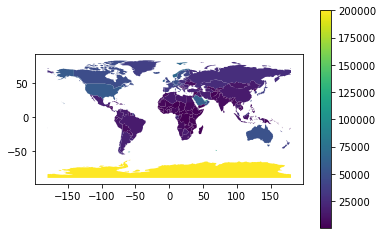

In [11]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['gdp_per_cap']= world.gdp_md_est / world.pop_est *1000000
fig, ax = plt.subplots(1, 1)
world.plot(column="gdp_per_cap",ax=ax, legend=True)

**Ok, but let's do some spatial stuff, huh?**

**How about a choropleth map based on per capital gdp?**

In [12]:
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

Let's reproject the data and change the 'colormap'

Here, we are borrowing functionality from fiona, another geospatial python library.

Fiona is actually a python wrapper for gdal/ogr. See: http://toblerity.org/fiona/manual.html

In particular, we want to get a Coordinate Reference System string that will correspond to a
specific Euler projection defined in a 'proj4' format string: "+proj=euler +lat_1=67 +lat_2=75"

Once we have put the projection into a format GeoPandas can understand, we can reproject the existing GeoDataFrame. The _inplace=True_ in the code below means the existing GeoDataFrame called 'world' is modified, instead of us needing to assign the result of the method/function to a new variable.

<AxesSubplot:>

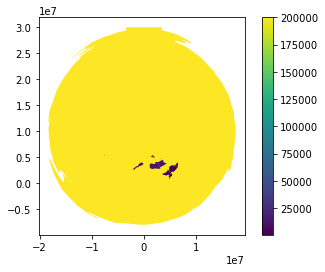

In [13]:
import fiona
import fiona.crs
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['gdp_per_cap']= world.gdp_md_est / world.pop_est *1000000

EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")

world.to_crs(crs=EulerCRS, inplace=True)
fig, ax = plt.subplots(1, 1)

world.plot(column="gdp_per_cap",ax=ax, legend=True)

### Uh oh, something went wrong. Can you figure out what it is?












...Antarctica has been flipped inside-out! The interior of Antarctica is now covering the whole planet and what used to be the interior of Antarctica is now an ocean. Oops! This is a result from the interaction of our particular data, the projection, and the drawing algorithm. The easiest way to revolve this issue is to remove Antarctica...

<AxesSubplot:>

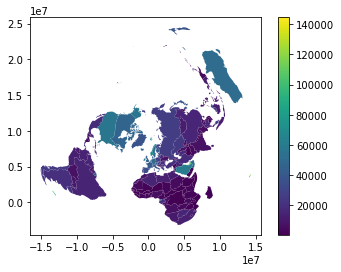

In [14]:
import fiona
import fiona.crs
import matplotlib.pyplot as plt

EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")

world.to_crs(crs=EulerCRS, inplace=True)
fig, ax = plt.subplots(1, 1)
worldWithoutAntarctica = world[(world['name'] != 'Antarctica')]
worldWithoutAntarctica.plot(column="gdp_per_cap",ax=ax, legend=True)


That single line above created a geoDataFrame **without** Antarctica in it.
It is, in essence, a select by attribute query done in a single line of code.

### Ok, this is getting long.
And I want you to start playing with some data, but I want to show you one more thing in geopandas. I am going to load in a point layer of cities data. I am then going to do a **select by location** where we select only cities in countries with a per capita GPD greater than 30000.

I will display those cities on the map.

C:\Users\oliya\anaconda3\envs\lab1\lib\site-packages\IPython\core\interactiveshell.py:3191: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

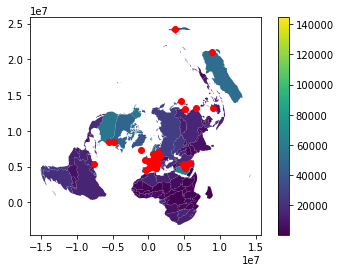

In [15]:
import matplotlib.pyplot as plt
#Just setting the 'base' for my map below (this could be called anything)
EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")
world.to_crs(crs=EulerCRS, inplace=True)
fig, ax = plt.subplots(1, 1)
worldWithoutAntarctica = world[(world['name'] != 'Antarctica')]
# fig, ax = plt.subplots(1, 1)
base = worldWithoutAntarctica.plot(
    column="gdp_per_cap",
    ax=ax, legend=True)



#Much like the countries data, I am using an included layer of cities.
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

#Now I am going to reproject the cities data
cities.to_crs(crs=EulerCRS, inplace=True)

#Time for a spatial join
cities_gdp = geopandas.sjoin(cities, worldWithoutAntarctica, how='inner', op='within')

#and the finale
cities_gdp[cities_gdp['gdp_per_cap']>30000].plot(ax=base, color='red')


That's not the prettiest map and the syntax can be a bit confusing (do you see how I nest my selection of 'greater than 30000' in there?).

But, that's a very simple demonstration of the power of GeoPandas to manipulate and visualize spatial data.

### Now we're going to work with GeoPandas to create a web map.

Here's what I am going to do:
1. Load up a shapefile (yes, GeoPandas can handle them)
2. Convert said shapefile to .geojson
3. Create two points and similarly store them as .geojson
4. Load all of that up on a web map using Folium

I'll explain each step along the way and I'll then ask you to do something similar. This part of the lab only has one question because I want you to **take your time to make sure you understand this!**


<AxesSubplot:>

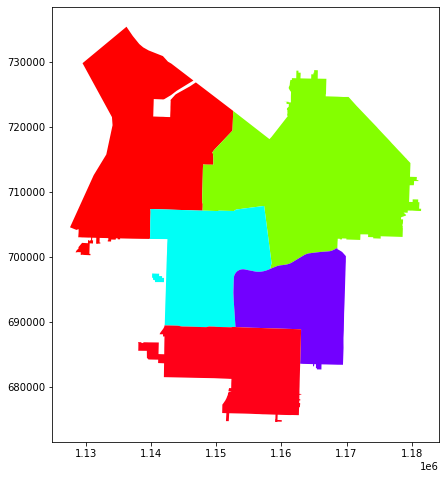

In [16]:
#your location may differ
#This is just the Tacoma City Council Districts
tacoma = geopandas.read_file(r'C:\Users\oliya\Documents\TGIS501_lab3_Files-main\Tacoma_CCD\City_Council_Districts__Tacoma_.shp') #what an ugly file name

#Let's just plot it and take a look
tacoma.plot(column='DIST_ID', #this is a column in the file, feel free to open it in arcprop to look
           linewidth=0.0,
           figsize=(8,8),
           cmap='hsv'
            
           )

In [17]:
#Now, let's output each council district as a .geojson file
tacoma = geopandas.read_file(r'C:\Users\oliya\Documents\TGIS501_lab3_Files-main\Tacoma_CCD\City_Council_Districts__Tacoma_.shp') #what an ugly file name

tacoma = tacoma.to_crs(epsg=4326)
#I'm just moving this back to WGS 1984 because some GeoJSON readers can't handle other projections
#Although they should be able to!

import os

for district in tacoma['DIST_ID']:
    filename = 'District'+str(district)+'.geojson'
    print('Outputting: '+filename)
    try:
        os.remove(filename)
    except OSError:
        pass
    tacoma[tacoma['DIST_ID'] == district].to_file(filename, driver='GeoJSON')
    
    # the .to_file() method of a GeoDataFrame writes it out to a Shapefile (or, in this case,
    #  when I set the driver="GEOSJON", so a GeoJSON file.)
    
    # Note the whole try/except business is just because the to_file throws an error if 
    #  the file already exists, so we delete it manually.
    # If we don't get an error, we just move right along

    

Outputting: District1.geojson
Outputting: District2.geojson
Outputting: District3.geojson
Outputting: District4.geojson
Outputting: District5.geojson


C:\Users\oliya\anaconda3\envs\lab1\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\oliya\anaconda3\envs\lab1\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\oliya\anaconda3\envs\lab1\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\oliya\anaconda3\envs\lab1\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\U

Whew, now we have five geojson files. One for each City Council district of Tacoma.

Let's see what happens if we load them onto a web map.
Here, we're going to be using [Folium](https://github.com/python-visualization/folium) which is essentially a python wrapper for creating [Leaflet](http://leafletjs.com/) maps.

You install it just like any other module. ;)

In [18]:
import folium

m = folium.Map(
        location=[47.2529, -122.4443],
        zoom_start=9
         )



m

### Pretty swanky. 

That's raw html, too; so, you could save it as such and use it in a web page. The command would be `m.save('MyAwesomeMap.html')`

Notice that I just did one of the geojson files there... how might you do all of them? 
Could you *perhaps* use a loop? Are you starting to see how you might go to a website (such as the Tacoma GIS repository), download data from it, process that data, and generate a web map... all from code?

### Last 'thing' to show you, then your final two questions

Now, let's create some points in GeoPandas and then put them on the map.
How about one roughly near UWT and one up near Proctor.

To do this, I'm going to pretend you have a bit of 'data' in a specific format, then I'll walk through how we convert that format into something GeoPandas can handle programmatically. It's a bit contrived, as you'll see, but think about how you might - *I don't know* - just read in various files and parse them in this way.

In [19]:
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt


df = pd.DataFrame({'place': ['uwt', 'ups'],
     'Latitude': [47.246613, 47.263660],
     'Longitude': [-122.43881, -122.482941]})

geo_df = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))
print(geo_df.head())
map = folium.Map(location = [47.2529,-122.4443], tiles='OpenStreetMap', zoom_start = 12)
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]
i = 0
for coordinates in geo_df_list:
    #assign a color marker for the type of volcano, Strato being the most common
    if geo_df.place[i] == "uwt":
        type_color = "green"
    elif geo_df.place[i] == "ups":
        type_color = "blue"
    else:
        type_color = "purple"
    map.add_child(folium.Marker(location = coordinates,
                            popup =
                            "coordinates: " + str(geo_df.geometry[i]) + '<br>' +
                            "place: " + str(geo_df.place[i]) + '<br>', icon = folium.Icon(color = "%s" % type_color)))
    i = i + 1
map

  place   Latitude   Longitude                     geometry
0   uwt  47.246613 -122.438810  POINT (-122.43881 47.24661)
1   ups  47.263660 -122.482941  POINT (-122.48294 47.26366)


## Hey, what's going on?

Look at the bottom there. There's no valid geometry column, GeoPandas can't recognize the separate lat and long entries.

Let's do this again:
1. Make a Pandas Dataframe
2. Make a GeoSeries (this is like a fancy list that GeoPandas uses for geometry) with our coordinates
3. Make a GeoDataFrame that has the GeoSeries for geometry and the DataFrame as our attribute data
4. Map it on a slippy map

In [20]:
import shapely, shapely.geometry, fiona, fiona.crs, pandas, folium
import pandas as pd
import geopandas
import folium
import matplotlib.pyplot as plt

data = [['UWT', 47.246613, -122.438813], ['UPS',47.263660,-122.482941]]

panda = pandas.DataFrame(data, columns=['name','lat','long'])
print(panda)

#Here I use the zip function to basically... 'zip' two list items into one.
#Find out more here: https://docs.python.org/2/library/functions.html#zip
coords = zip(panda['long'], panda['lat'])

#I am going to collapse a for loop into a single line here, watch how

geometry = [shapely.geometry.Point(c) for c in coords]
#Shapely is a library with the point data type GeoPandas uses for coordinates

#Now, I'm going to make that geometry into a GeoSeries
geolist = geopandas.GeoSeries(geometry)

#Ok, let's put it all together.
geoPoints = geopandas.GeoDataFrame(
        panda,
        geometry=geolist)

#And now, TO A WEB MAP
geoPoints.crs=fiona.crs.from_epsg(4236) #What am I doing here? Why?

m2 = folium.Map(
                location=[47.2529, -122.4443],
                zoom_start=12,
                tiles='Stamen Terrain') #You can pass lots of tiles, even those you've made yourself

twopoints = folium.features.GeoJson(geoPoints.to_json()).add_to(m2)

m2


  name        lat        long
0  UWT  47.246613 -122.438813
1  UPS  47.263660 -122.482941


C:\Users\oliya\anaconda3\envs\lab1\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


### Problem 5: How far? (4pts)

1. Write a **function** that calculates the distance between two points. 
2. Have your script use that function to calculate the distance between the UWT and UPS points above.
3. +1 bonus point: Calculate the distance in feet.

**Hint:** *Look into the GeoPandas .distance() method. But, also, consider how GeoPandas calculates it. You cn find a good stack exchange answer on this [here](https://gis.stackexchange.com/questions/166675/what-units-are-used-by-geopandas-shapely-area-and-distance-functions).*



In [21]:
# This is a spatial data frame that we created previously.
# You might consider recreating the points, or you can work from this existing structure
print(geoPoints)

  name        lat        long                     geometry
0  UWT  47.246613 -122.438813  POINT (-122.43881 47.24661)
1  UPS  47.263660 -122.482941  POINT (-122.48294 47.26366)


In [22]:
import geopy.distance

def distance(coords_1, coords_2):
    return 'The distance between UPS and UWT is',round(geopy.distance.distance(coords_1, coords_2).miles, 2),'miles'
print(distance((47.26366, -122.48294),(47.24661, -122.43882)))

('The distance between UPS and UWT is', 2.39, 'miles')


### Problem 6: Choropleths everywhere (5 pts)

1. Take the naturalearth_lowrest file hat we manipulated earlier and use it to create a choropleth map in Folium of **per capital gdp**
2. The output is an interactive Leaflet map (via Folium) that has countries sorted by per capita gdp into a choropleth - I do not care what method you use (quintiles, jenks, etc.) nor do I care about your color ramp (just this one time).
3. This is the hardest question you've been asked yet, **don't leave it to the last minute!** Partial credit is, of course, possible. Good luck!

In [23]:
import pandas as pd
import folium 
from folium.plugins import StripePattern
import geopandas as gpd
import numpy as np


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdp_per_cap = world.gdp_md_est / world.pop_est *1000000
world['gdp_per_cap'] = gdp_per_cap.values
world.head()
# Initialize folium map.
map = folium.Map(location=[0, 0], zoom_start=2)

# Set up Choropleth map
folium.Choropleth(
                geo_data=world,
                data=world,
                columns=['name',"gdp_per_cap"],
                key_on="feature.properties.name",
                fill_color='YlGnBu',
                fill_opacity=0.7,
                legend_name="GDP per capital",
                Highlight= True,
                line_opacity=0.2,
                name = "gdp_per_cap",
                reset=True,
                ).add_to(map)

map




### Where you should be at the end?

This lab covers a lot of ground. It moves us from working with functions and classes all the way up through to open-source GIS and the manipulation of spatial data. It can seem overwhelming. Make sure you take your time and work through it, speak with your peers, talk to me.

We start with GeoPandas and Folium for two reasons: First, you already have some familiarity with Leaflet and so learning how you can generate Leaflet maps from spatial data processed in python is of great utility. Second, *believe it or not*, ESRI has incorporated much of GeoPandas **into** both ArcPy and the ArcGIS API. Next week, we'll start looking at the API and things will come full circle - from ESRI to open-source and back.

<AxesSubplot:>

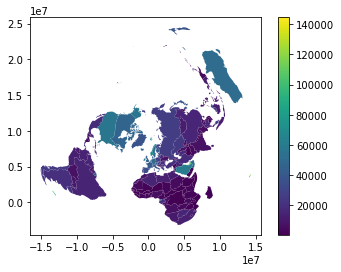

In [24]:
import fiona
import fiona.crs

EulerCRS = fiona.crs.from_string("+proj=euler +lat_1=67 +lat_2=75")

world.to_crs(crs=EulerCRS, inplace=True)
fig, ax = plt.subplots(1, 1)
worldWithoutAntarctica = world[(world['name'] != 'Antarctica')]
worldWithoutAntarctica.plot(column="gdp_per_cap",ax=ax, legend=True)

In [25]:
def multiplystuff(x, y):
    z = x * y
    return z


#What does this output?
print(multiplystuff(3,5)

#and this?
print(z)

SyntaxError: invalid syntax (4266425873.py, line 10)